# Mesh Segmentation Demo

This notebook demonstrates how to use the `MeshSegmenter` class to slice a mesh into segments along the z-axis and analyze their connectivity.

In [1]:
import numpy as np
from gencomo import create_cylinder_mesh, MeshSegmenter, visualize_mesh_3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Create a Demo Cylinder

First, let's create a simple cylinder mesh to segment.

In [2]:
# Create a cylinder mesh
cylinder = create_cylinder_mesh(radius=1.0, length=3.0, resolution=20)

print(f"Cylinder properties:")
print(f"  Volume: {cylinder.volume:.3f}")
print(f"  Surface area: {cylinder.area:.3f}")
print(f"  Z-bounds: {cylinder.bounds[:, 2]}")

# Visualize the original cylinder
visualize_mesh_3d(cylinder, title="Original Cylinder")

Cylinder properties:
  Volume: 9.271
  Surface area: 24.952
  Z-bounds: [-1.5  1.5]


<trimesh.Scene(len(geometry)=1)>

## Segment the Mesh

Now let's use the `MeshSegmenter` to slice the cylinder into segments.

In [12]:
# Create segmenter and segment the mesh with reasonable minimum volume
segmenter = MeshSegmenter()
segments = segmenter.segment_mesh(cylinder, slice_width=0.5, min_volume=0.5)

print(f"\nSegmentation complete!")
print(f"Created {len(segments)} segments")
print("\nNote: This cylinder mesh has most of its volume in the end caps,")
print("which is why we see fewer segments than expected slices.")

Segmenting mesh (z: -1.500 to 1.500) into 6 slices
Created 6 segments across 6 slices

Segmentation complete!
Created 6 segments

Note: This cylinder mesh has most of its volume in the end caps,
which is why we see fewer segments than expected slices.


## Analyze the Segments

Let's examine the properties of each segment.

In [13]:
# Display segment information
print("Segment Details:")
print("-" * 80)
for segment in segments:
    print(f"ID: {segment.id}")
    print(f"  Slice: {segment.slice_index}, Z-range: [{segment.z_min:.2f}, {segment.z_max:.2f}]")
    print(f"  Volume: {segment.volume:.4f}")
    print(f"  Exterior area: {segment.exterior_surface_area:.4f}")
    print(f"  Interior area: {segment.interior_surface_area:.4f}")
    print(f"  Centroid: [{segment.centroid[0]:.2f}, {segment.centroid[1]:.2f}, {segment.centroid[2]:.2f}]")
    print()

Segment Details:
--------------------------------------------------------------------------------
ID: slice_0_seg_0
  Slice: 0, Z-range: [-1.50, -1.00]
  Volume: 9.2705
  Exterior area: 18.7721
  Interior area: 3.0902
  Centroid: [-0.00, -0.00, -0.21]

ID: slice_1_seg_0
  Slice: 1, Z-range: [-1.00, -0.50]
  Volume: 9.2705
  Exterior area: 18.7721
  Interior area: 0.0000
  Centroid: [-0.00, -0.00, 0.00]

ID: slice_2_seg_0
  Slice: 2, Z-range: [-0.50, 0.00]
  Volume: 9.2705
  Exterior area: 18.7721
  Interior area: 0.0000
  Centroid: [-0.00, -0.00, 0.00]

ID: slice_3_seg_0
  Slice: 3, Z-range: [0.00, 0.50]
  Volume: 9.2705
  Exterior area: 18.7721
  Interior area: 0.0000
  Centroid: [-0.00, -0.00, 0.00]

ID: slice_4_seg_0
  Slice: 4, Z-range: [0.50, 1.00]
  Volume: 9.2705
  Exterior area: 18.7721
  Interior area: 0.0000
  Centroid: [-0.00, -0.00, 0.00]

ID: slice_5_seg_0
  Slice: 5, Z-range: [1.00, 1.50]
  Volume: 9.2705
  Exterior area: 18.7721
  Interior area: 3.0902
  Centroid: [0.00,

## Compute Statistics

Let's get overall statistics about the segmentation.

In [15]:
# Get segmentation statistics
stats = segmenter.compute_segmentation_statistics()

print("Segmentation Statistics:")
print(f"  Total segments: {stats['total_segments']}")
print(f"  Total slices: {stats['total_slices']}")
print(f"  Connected components: {stats['connected_components']}")

print(f"\nVolume Statistics:")
print(f"  Total volume: {stats['volume_stats']['total']:.4f}")
print(f"  Mean volume per segment: {stats['volume_stats']['mean']:.4f}")
print(f"  Volume std dev: {stats['volume_stats']['std']:.4f}")

print(f"\nSurface Area Statistics:")
print(f"  Total exterior area: {stats['exterior_area_stats']['total']:.4f}")
print(f"  Total interior area: {stats['interior_area_stats']['total']:.4f}")

print(f"\nSegments per slice: {stats['segments_per_slice']['mean']:.1f} ± {stats['segments_per_slice']['std']:.1f}")

Segmentation Statistics:
  Total segments: 6
  Total slices: 6
  Connected components: 1

Volume Statistics:
  Total volume: 55.6231
  Mean volume per segment: 9.2705
  Volume std dev: 0.0000

Surface Area Statistics:
  Total exterior area: 112.6328
  Total interior area: 6.1803

Segments per slice: 1.0 ± 0.0


## Analyze Connectivity

Check how the segments are connected to each other.

In [14]:
# Check connectivity
connected_components = segmenter.get_connected_components()

print(f"Connected Components:")
for i, component in enumerate(connected_components):
    print(f"  Component {i+1}: {len(component)} segments")
    for seg_id in component:
        segment = segmenter.get_segment_by_id(seg_id)
        print(f"    - {seg_id} (slice {segment.slice_index})")

# Show connections for each segment
print(f"\nSegment Connections:")
for segment in segments:
    connections = segmenter.get_connected_segments(segment.id)
    print(f"  {segment.id} connects to: {connections}")

Connected Components:
  Component 1: 6 segments
    - slice_0_seg_0 (slice 0)
    - slice_1_seg_0 (slice 1)
    - slice_2_seg_0 (slice 2)
    - slice_3_seg_0 (slice 3)
    - slice_4_seg_0 (slice 4)
    - slice_5_seg_0 (slice 5)

Segment Connections:
  slice_0_seg_0 connects to: ['slice_1_seg_0']
  slice_1_seg_0 connects to: ['slice_0_seg_0', 'slice_2_seg_0']
  slice_2_seg_0 connects to: ['slice_1_seg_0', 'slice_3_seg_0']
  slice_3_seg_0 connects to: ['slice_2_seg_0', 'slice_4_seg_0']
  slice_4_seg_0 connects to: ['slice_3_seg_0', 'slice_5_seg_0']
  slice_5_seg_0 connects to: ['slice_4_seg_0']


## Visualize Individual Segments

Let's visualize a few individual segments to see how they look.

In [16]:
# Visualize the first few segments
for i, segment in enumerate(segments[:3]):  # Show first 3 segments
    print(f"\nSegment {i+1}: {segment.id}")
    visualize_mesh_3d(segment.mesh, 
                      title=f"Segment {segment.id}",
                      color='lightblue')


Segment 1: slice_0_seg_0

Segment 2: slice_1_seg_0

Segment 3: slice_2_seg_0


## Visualize Connectivity Graph

Create a visual representation of how segments are connected.

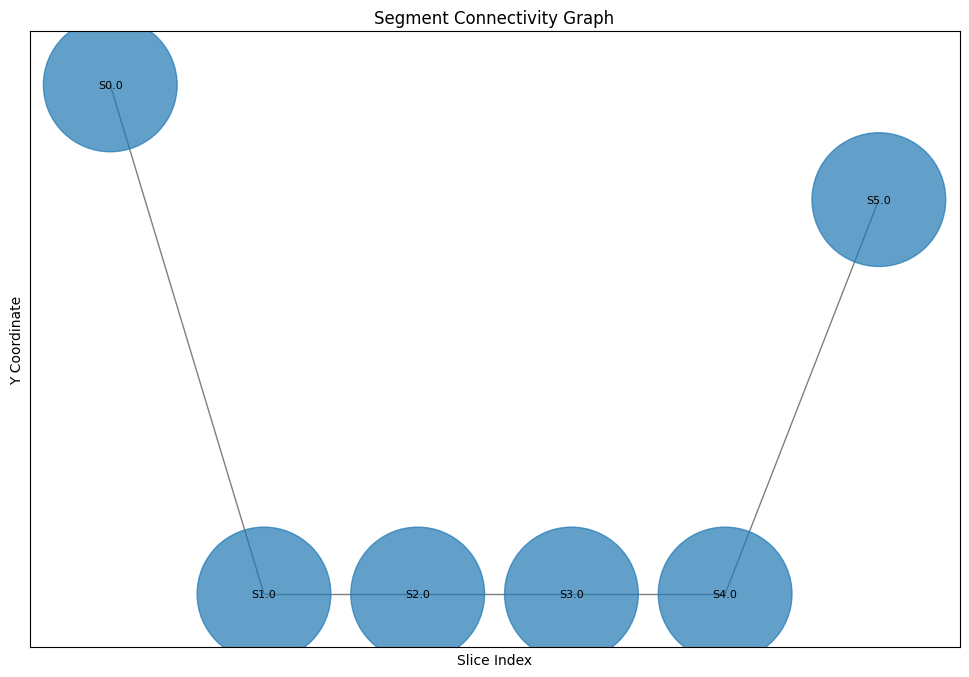

In [18]:
# Visualize the connectivity graph
segmenter.visualize_connectivity_graph()

## Summary

This demo showed how to:
1. Create a mesh segmenter 
2. Segment a cylinder mesh into fixed-width **slices** along the z-axis
3. Identify **segments** as connected components within each slice  
4. Analyze segment properties (volume, surface areas)
5. Examine connectivity between segments in adjacent slices
6. Visualize individual segments and the connectivity graph

**Key Concepts:**
- **Slices** = 3D volumes between z-planes (e.g., z=-1.0 to z=-0.5)
- **Segments** = Connected components within each slice (one segment per closed region)
- **Connectivity** = Graph edges between segments that share faces in 3D space

The segmentation algorithm correctly identifies that this particular cylinder mesh has most of its geometry concentrated in the end caps, resulting in fewer segments than the number of slices. For meshes with more uniform geometry (like a torus), we would see exactly one segment per slice.